# Voronoi orbit binning
This testing notebook expects an existing all_models table and will act on its best-fit model.

In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import cmasher

from vorbin.voronoi_2d_binning import voronoi_2d_binning

import dynamite as dyn

print('DYNAMITE version', dyn.__version__)
print('    installed at ', dyn.__path__)  # Uncomment to print the complete DYNAMITE installation path

fname = 'user_test_config_ml.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)
# c = dyn.config_reader.Configuration(fname, reset_logging=True, reset_existing_output=True)
# _ = dyn.model_iterator.ModelIterator(c)

[INFO] 01:08:10 - dynamite.config_reader.Configuration - Config file user_test_config_ml.yaml read.
[INFO] 01:08:10 - dynamite.config_reader.Configuration - io_settings...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - Output directory tree: NGC6278_output/.
[INFO] 01:08:10 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - model_components...


DYNAMITE version 4.2.0
    installed at  ['/Users/maindl/.local/lib/python3.11/site-packages/dynamite']


[INFO] 01:08:10 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - Will attempt to recover partially run models.
[INFO] 01:08:10 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - legacy_settings...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 01:08:10 - dynamite.config_reader.Configuration - ... using 8 CPUs for orbit integration.
[INFO] 01:08:10 - dynamite.config_reader.Configuration - ... using 8 CPUs for weight solving.
[INFO] 01:08:10 - dynamite.config_reader.Configuration - System assembled
[INFO] 01:08:10 - dynamite.config_reader.Configuration - Configuration validated
[INFO] 01:08:10 - dynamite.config_reader.Configuration - Instantiate

In [2]:
# instantiate a Coloring object
coloring = dyn.coloring.Coloring(c)

In [3]:
# define the number of r and lambda_z bins
nr = 6
nl = 7

In [4]:
plotter = dyn.plotter.Plotter(c)

[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary -     - 13.1% of z-tubes
[INFO] 01:08:10 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification DONE.
[INFO] 01:08:11 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 01:08:17 - dynamite.weig

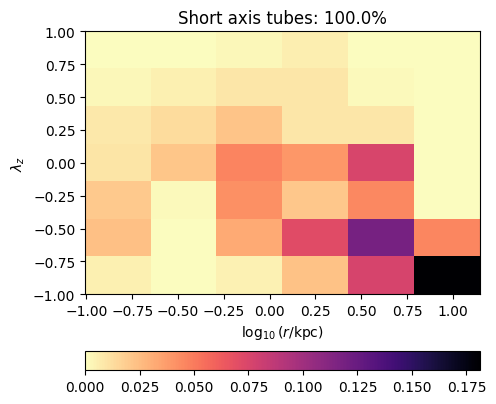

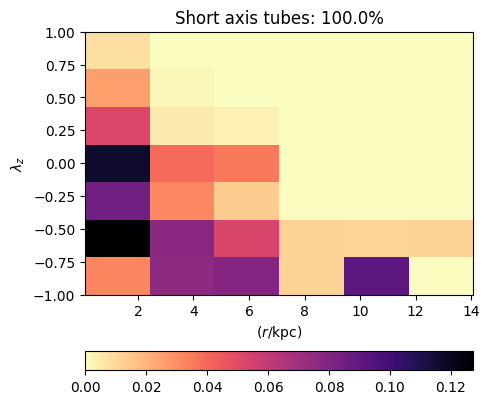

In [5]:
# get an overview of the orbit distribution
# NOTE: when using force_lambda_z=True, then the titles of the orbit-distribution plots are incorrect.
# All orbits are shown in this distribution - not only short-axis tubes!
fig1 = plotter.orbit_distribution(model=None, minr=None, maxr=None, r_scale='log', nr=nr, nl=nl,
                                  orientation='vertical', subset='short', force_lambda_z=True)
fig2 = plotter.orbit_distribution(model=None, minr=None, maxr=None, r_scale='linear', nr=nr, nl=nl,
                                  orientation='vertical', subset='short', force_lambda_z=True)

[INFO] 01:08:26 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 01:08:32 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 01:08:32 - dynamite.orblib.LegacyOrbitLibrary -     - 13.1% of z-tubes
[INFO] 01:08:32 - dynamite.orbli

Bin-accretion...
1  /  10
2  /  10
3  /  10
4  /  10
5  /  10
6  /  10
7  /  10
8  /  10
9  /  10
10  /  10
11  /  10
12  /  10
13  /  10
14  /  10
15  /  10
16  /  10
17  /  10
18  /  10
19  /  10
20  /  10
21  /  10
22  /  10
23  /  10
24  /  10
24  initial bins.
Reassign bad bins...
11  good bins.
Unbinned pixels:  3  /  42
Fractional S/N scatter (%): 72.66204943703148
Elapsed time accretion: 0.01 seconds
Elapsed time optimization: 0.00 seconds


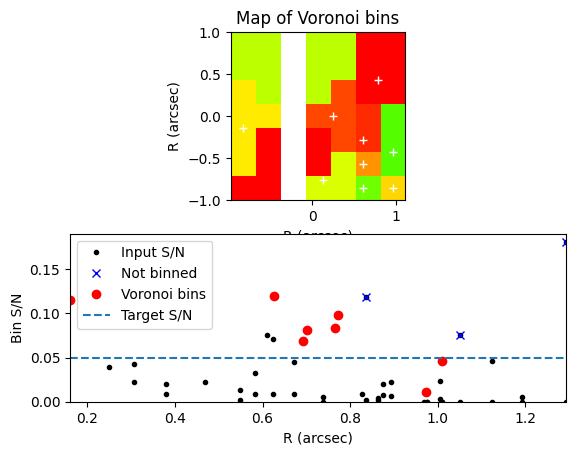

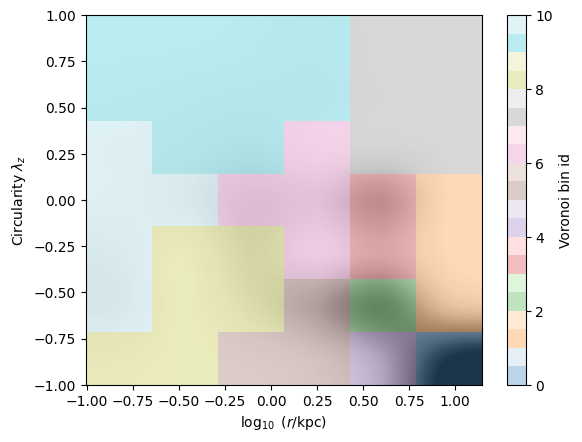

In [6]:
# Perform Voronoi binning of orbits in the radius-circularity phase space. The goal is to group the "original"
# n_orbits orbit bundles into fewer n_bundle "Voronoi" bundles with each of these Voronoi bundles accounting for
# a weight of at least ``vor_weight``.
# The result is a tuple (vor_bundle_mapping, phase_space_binning):
#     vor_bundle_mapping : np.array of shape (n_bundle, n_orbits)
#         Mapping between the "original" orbit bundles and the Voronoi
#         orbit bundles: vor_bundle_mapping(i_bundle, i_orbit) is the
#         fraction of i_orbit assigned to i_bundle, multiplied by i_orbit's weight.
#     phase_space_binning : dict
#         'in': np.array of shape (3, nr*nl), the binning input:
#         bin r, bin lambda_z, bin total weight
#         'out': np.array of shape (3, n_bundle), the Voronoi binning output:
#         weighted Voronoi bin centroid coordinates r_bar, lambda_bar
#         and Voronoi bin total weights
#         'map': np.array of shape (nr*nl,) the phase space mapping:
#         Voronoi bin numbers for each input bin
vor_weight = 0.05  # define the desired (minimum) total orbital weight in each Voronoi bin
vor_bundle_mapping, phase_space_binning = coloring.bin_phase_space(model=None,
                                                                   minr='auto',
                                                                   maxr='auto',
                                                                   r_scale='log',
                                                                   nr=nr,
                                                                   nl=nl,
                                                                   vor_weight=vor_weight,
                                                                   vor_ignore_zeros=False,
                                                                   make_diagnostic_plots=True,
                                                                   extra_diagnostic_output=True,
                                                                   cvt=False,
                                                                   wvt=False)

In [7]:
a = dyn.analysis.Analysis(c)

In [8]:
bundle_maps = a.get_flux_for_orbit_bundles(pop_set=0, bundle_mapping=vor_bundle_mapping, sb_maps=True)

[INFO] 01:08:35 - dynamite.analysis.Analysis - Getting model projected masses.
[INFO] 01:08:35 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 01:08:40 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output
/Users/maindl/.local/lib/python3.11/site-packages/dynamite/analysis.py:605: RuntimeWarning: divide by zero encountered in log10
  map_plotter(np.log10(flux / np.nanmax(flux)),
[INFO] 01:08:47 - dynamite.analysis.Analysis - Surface brightness maps written to NGC6278_output/plots/bundle_sb_maps_pop_kinset1_pop.png.


![sb_map](NGC6278_output/plots/bundle_sb_maps_pop_kinset1_pop.png)

/var/folders/1b/fphkt4y96ssbkc0ssnj56m1c0000gn/T/ipykernel_41923/3549863315.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.log10(vor_bundle_mapping), shading='flat', cmap='Greys')


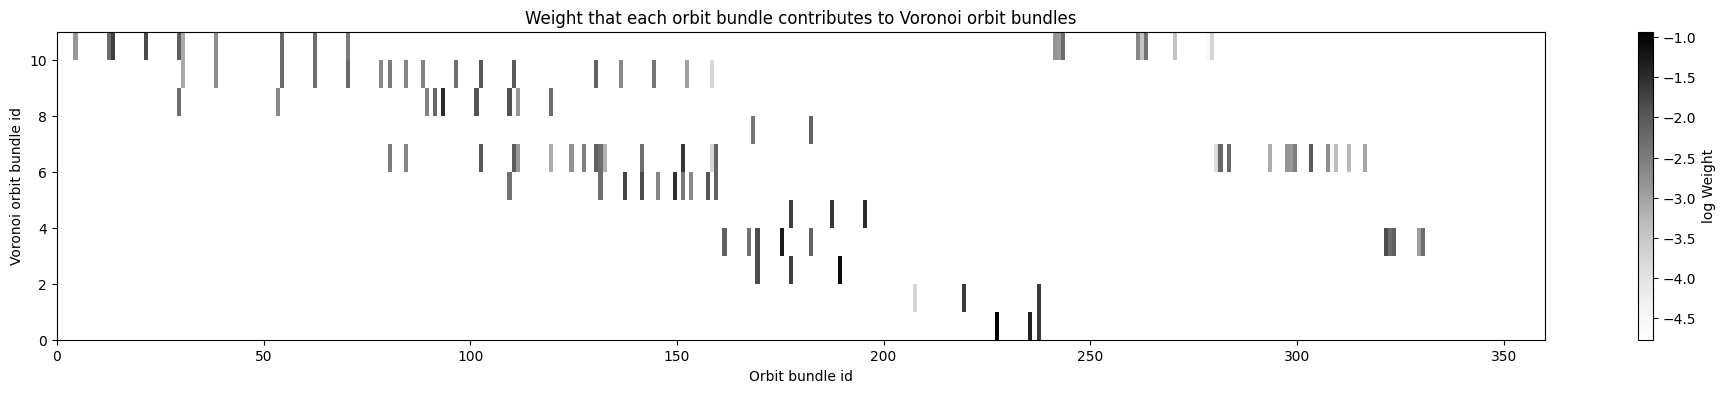

In [11]:
# If dithering > 1, orbit bundles may contribute to multiple Voronoi orbit bundles
plt.figure(figsize=(24,4))
plt.gca().set_title('Weight that each orbit bundle contributes to Voronoi orbit bundles')
plt.pcolormesh(np.log10(vor_bundle_mapping), shading='flat', cmap='Greys')
plt.xlabel('Orbit bundle id')
plt.ylabel('Voronoi orbit bundle id')
plt.colorbar(label='log Weight')

In [12]:
# for each input bin: r coordinate, lambda_z coordinate, total weight
print(f'{phase_space_binning["in"].shape=}')
# phase_space_binning['in']

phase_space_binning["in"].shape=(3, 42)


In [13]:
# for each Voronoi bin: weighted centroid coordinates r_bar, lambda_bar and total weight
print(f'{phase_space_binning["out"].shape=}')
# phase_space_binning['out']

phase_space_binning["out"].shape=(3, 11)


In [14]:
# phase space mapping: Voronoi bin numbers for each input bin
print(f'{phase_space_binning["map"].shape=}')
phase_space_binning['map']

phase_space_binning["map"].shape=(42,)


array([ 8,  8,  5,  5,  4,  0, 10,  8,  8,  5,  2,  1, 10,  8,  8,  6,  3,
        1, 10, 10,  6,  6,  3,  1, 10,  9,  9,  6,  7,  7,  9,  9,  9,  9,
        7,  7,  9,  9,  9,  9,  7,  7])

In [15]:
# orbit bundle mapping: weighted contribution of each "original" orbit bundle to the Voronoi orbit bundles
print(f'{vor_bundle_mapping.shape=}')

vor_bundle_mapping.shape=(11, 360)


## Testing the orbit binning
As dithering=1, each "original" orbit bundle is just one orbit. Hence, 100% of each such orbit bundle will lie in a unique $r, \lambda_z$ input bin and the `vor_bundle_mapping` will map these "original" orbit bundles to the Voronoi orbit bundles.

To test the orbit binning, we will - for each Voronoi bin (corresponding to one Voronoi orbit bundle each) - identify the connected "original" orbit bundles and add up their weighted fractions. These should be the same whether computed (a) from the binning input data, (b) from the total weights in the Voronoi bins, and (c) from adding all "original" orbit bundles' contributions in the `vor_bundle_mapping`.

In [16]:
for vor_bin in range(phase_space_binning['out'].shape[-1]):  # do the following for each Voronoi bin

    input_bins = np.where(phase_space_binning['map']==vor_bin)[0]
    print(f'\ninput bins mapped to {vor_bin=}: {input_bins}')

    # orbit weights in input bins:
    weight_in = [phase_space_binning['in'][2][i] for i in input_bins]  # phase_space_binning['in'].shape=(3, nr*nl), holds r, l, w for each input bin
    weight_in_total = sum(weight_in)
    print(f'{weight_in=}, {weight_in_total=}')

    vorbin_weight = phase_space_binning['out'][2][vor_bin]  # phase_space_binning['out'].shape=(3, n_bundle), holds r, l, w for each Voronoi bin
    print(f'{vorbin_weight     = }')

    vor_bundle_weight = np.sum(vor_bundle_mapping[vor_bin])  # vor_bundle_mapping.shape=(n_bundle, n_orbits), contribution of orbit-weights to Voronoi bins
    print(f'{vor_bundle_weight = }')

    print('Test succeeded? ', np.isclose(weight_in_total, vorbin_weight) and np.isclose(weight_in_total, vor_bundle_weight))


input bins mapped to vor_bin=0: [5]
weight_in=[0.18123198422914275], weight_in_total=0.18123198422914275
vorbin_weight     = 0.18123198422914275
vor_bundle_weight = 0.18123198422914275
Test succeeded?  True

input bins mapped to vor_bin=1: [11 17 23]
weight_in=[0.04567506360336338, 0.0, 0.00017997908508053434], weight_in_total=0.04585504268844392
vorbin_weight     = 0.04585504268844392
vor_bundle_weight = 0.04585504268844391
Test succeeded?  True

input bins mapped to vor_bin=2: [10]
weight_in=[0.11845238326514292], weight_in_total=0.11845238326514292
vorbin_weight     = 0.11845238326514292
vor_bundle_weight = 0.11845238326514292
Test succeeded?  True

input bins mapped to vor_bin=3: [16 22]
weight_in=[0.04493620653725276, 0.07527688759195564], weight_in_total=0.1202130941292084
vorbin_weight     = 0.1202130941292084
vor_bundle_weight = 0.1202130941292084
Test succeeded?  True

input bins mapped to vor_bin=4: [4]
weight_in=[0.07582113514049987], weight_in_total=0.07582113514049987
vor

In [17]:
stars.population_data

[Populations({'aperturefile': 'aperture.dat', 'binfile': 'bins.dat', 'logger': <Logger dynamite.populations.Populations (DEBUG)>, 'name': 'kinset1_pop', 'datafile': 'gauss_hermite_kins_with_pops.ecsv', 'input_directory': 'NGC6278_input/', 'data': <Table length=152>
 vbin_id    t       dt      Z       dZ  
  int64  float64 float64 float64 float64
 ------- ------- ------- ------- -------
       1     3.0     0.5   100.0     5.0
       2     3.0     0.5   100.0     5.0
       3     3.0     0.5   100.0     5.0
       4     3.0     0.5   100.0     5.0
       5     3.0     0.5   100.0     5.0
       6     3.0     0.5   100.0     5.0
       7     3.0     0.5   100.0     5.0
       8     3.0     0.5   100.0     5.0
       9     3.0     0.5   100.0     5.0
     ...     ...     ...     ...     ...
     143     3.0     0.5   100.0     5.0
     144     3.0     0.5   100.0     5.0
     145     3.0     0.5   100.0     5.0
     146     3.0     0.5   100.0     5.0
     147     3.0     0.5   100.0     